# COMP0189: Applied Artificial Intelligence
## Week 2 (Data Preprocessing)

### After this week you will be able to ...
- load various datasets from sklearn
- know the importance of data scaling and preprocessing
- know that the sensitivity various between learning algorithms
- split the dataset into train and test set
- know what will happen if you apply different preprocessing steps to train and test set
- know how to encode categorical features to ordinal representation and how it affects the model performance
- know how to deal with missing data

### Acknowledgements
- https://github.com/UCLAIS/Machine-Learning-Tutorials
- https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

## Introduction to Scikit-learn

Why do we use sklearn??

1. Example Datasets
    - sklearn.datasets : Provides example datasets

2. Feature Engineering  
    - sklearn.preprocessing : Variable functions as to data preprocessing
    - sklearn.feature_selection : Help selecting primary components in datasets
    - sklearn.feature_extraction : Vectorised feature extraction
    - sklearn.decomposition : Algorithms regarding Dimensionality Reduction

3. Data split and Parameter Tuning  
    - sklearn.model_selection : 'Train Test Split' for cross validation, Parameter tuning with GridSearch

4. Evaluation  
    - sklearn.metrics : accuracy score, ROC curve, F1 score, etc.

5. ML Algorithms
    - sklearn.ensemble : Ensemble, etc.
    - sklearn.linear_model : Linear Regression, Logistic Regression, etc.
    - sklearn.naive_bayes : Gaussian Naive Bayes classification, etc.
    - sklearn.neighbors : Nearest Centroid classification, etc.
    - sklearn.svm : Support Vector Machine
    - sklearn.tree : DecisionTreeClassifier, etc.
    - sklearn.cluster : Clustering (Unsupervised Learning)

6. Utilities  
    - sklearn.pipeline: pipeline of (feature engineering -> ML Algorithms -> Prediction)

7. Train and Predict  
    - fit()
    - predict()

8. and more...

In [1]:
!pip install scikit-learn==1.1.3

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

**1. Boston House Price Dataset**

Let's first take a look at the Boston House Price dataset. This Dataset is deprecated as of version 1.2, but we will use this for educational purpose

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston.feature_names, len(boston.feature_names)

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 13)

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

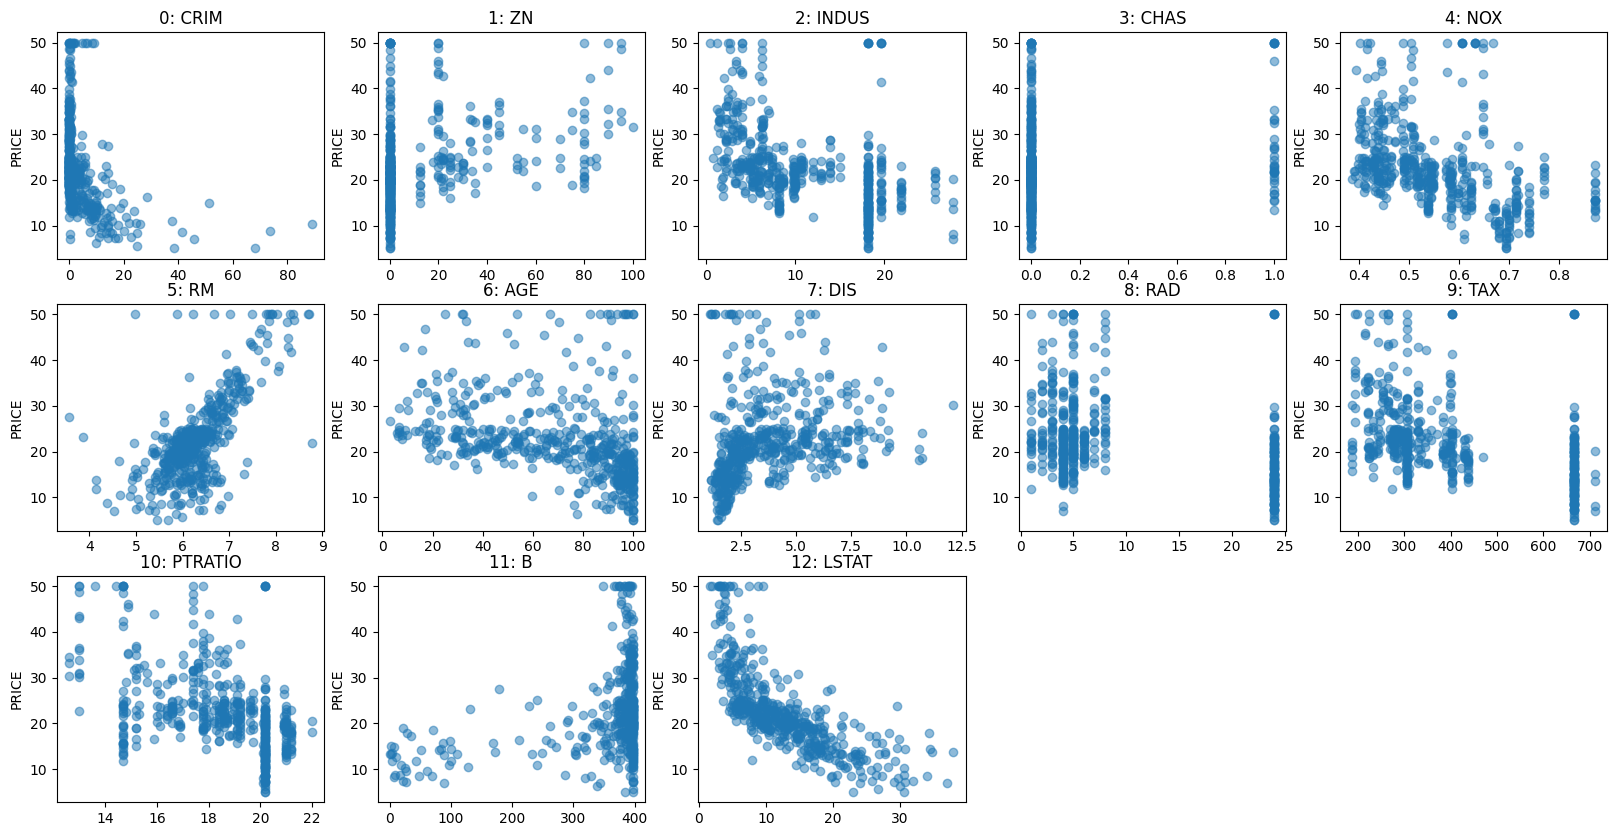

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("PRICE")
plt.show()

See how our data are spread in different ranges. 3rd feature (CHAS) is even in binary. Most of the algorithms perform poorly on these various input spaces.

**2. Wine Dataset**

In [8]:
from sklearn.datasets import load_wine

In [9]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [10]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
wine_X = wine.data
wine_labels = wine.target
wine_feature_names = wine.feature_names

In [12]:
wine_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
pd.DataFrame(wine_X, columns=wine_feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
def visualise_wine(X, labels=None, column_indices=(0,1), set_labels=False):
    """
    @param: X        --> Data
    @param: lables   --> Default is set to None, but if you've got your result of labels from clustering, 
                         you can input according labels in a list format.
    @param: column_indices --> column indices of dataset X to be selected for plotting.
                                 two-element tuple if you want 2D graph,
                                 three-element tuple if you want 3D graph.
    """
    assert type(column_indices) is tuple
    
    if len(column_indices)==2:  # 2D
        first_col, second_col = column_indices[0], column_indices[1]
        
        if set_labels:
            plt.xlabel(wine_feature_names[first_col])
            plt.ylabel(wine_feature_names[second_col])
            
        plt.scatter(X[:, first_col], X[:, second_col], c=labels)
        
    elif len(column_indices)==3:  # 3D
        first_col, second_col, third_col = column_indices[0], column_indices[1], column_indices[2]
        fig = plt.figure()
        plt.clf()
        ax = fig.add_subplot(projection='3d')

        plt.cla()
        
        if set_labels:
            ax.set_xlabel(wine_feature_names[first_col])
            ax.set_ylabel(wine_feature_names[second_col])
            ax.set_zlabel(wine_feature_names[third_col])

        ax.scatter(X[:, first_col], X[:, second_col], X[:, third_col], c=labels)
        
    else:
        raise RuntimeError("Your dimension should be either set to \"2d\" or \"3d\"")
    
    plt.tight_layout()
    plt.show()

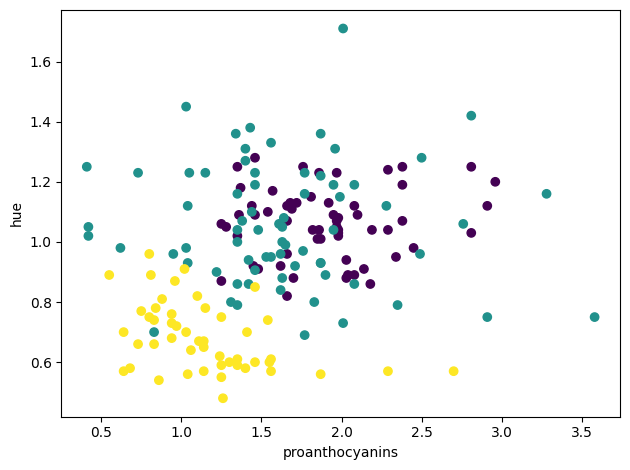

In [15]:
visualise_wine(wine_X, labels=wine_labels, column_indices=(8, 10), set_labels=True)

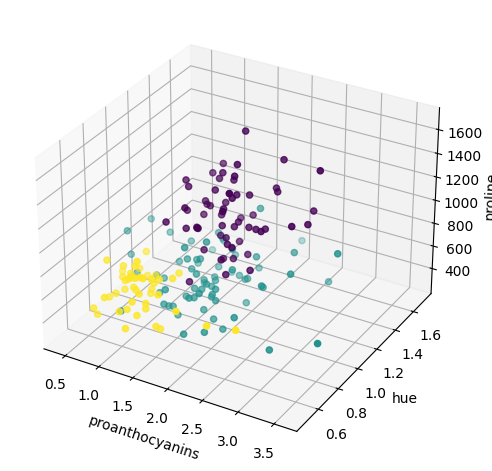

In [16]:
# try out different col_in_X and get some feeling of how the data is shaped.
visualise_wine(wine_X, labels=wine_labels, column_indices=(8, 10, 12), set_labels=True)

We will closely look into details of many functions in scikit-learn (fit, predict, PCA, metrics, etc.) in the following practicals as we learn more in lectures.  
For now, it is good to be familiar with datasets and the main takeaways we demonstrate.

## Exercise 1: Impact of feature scaling in ML pipeline

Normalization scales each input variable separately to the range 0-1.  
Standardization scales each input variable separately by subtracting the mean (centering) and dividing each of them by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

#### Examaple usage of sklearn.preprocessing.StandardScaler

In [18]:
# Example
unscaled_data = np.asarray([[100, 0.001],
 [8, 0.05],
 [50, 0.005],
 [88, 0.07],
 [4, 0.1]])
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_data = scaler.fit_transform(unscaled_data)

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>]], dtype=object)

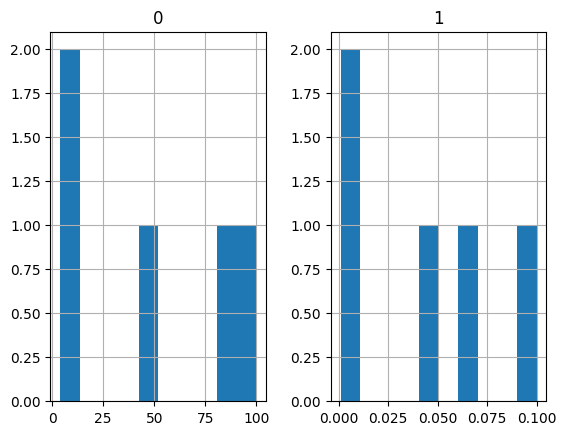

In [19]:
pd.DataFrame(unscaled_data).hist()

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>]], dtype=object)

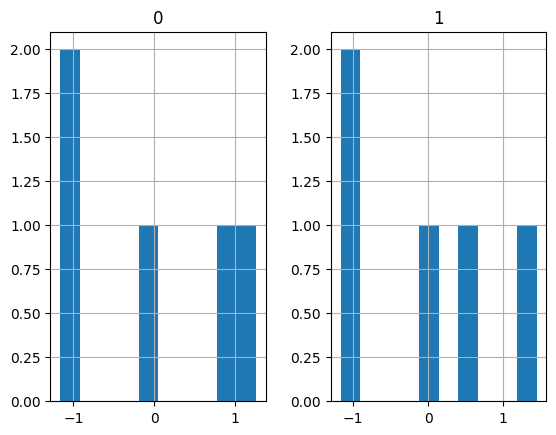

In [20]:
pd.DataFrame(scaled_data).hist()

In [21]:
del scaled_data, unscaled_data, scaler

**Questions**  
- Try using different methods, such as MinMaxScaler and Normalisation. Do you see the difference in the histogram?
- Experiment the effects of different feature scaling methods on one ML algorithm.

### Scaling Vs. Unscaling the Wine Dataset

In [22]:
RANDOM_STATE = 42
# We are using the wind dataset again
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

In [23]:
scaler = StandardScaler()
unscaled_X_train = X_train
unscaled_X_test = X_test

# scale data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
unscaled_model = KNeighborsClassifier()
scaled_model = KNeighborsClassifier()

In [25]:
unscaled_model.fit(unscaled_X_train, y_train)
scaled_model.fit(scaled_X_train, y_train);

In [26]:
unscaled_y_hat = unscaled_model.predict(unscaled_X_test)
scaled_y_hat = scaled_model.predict(scaled_X_test)

In [27]:
unscaled_acc = accuracy_score(y_test, unscaled_y_hat)
scaled_acc = accuracy_score(y_test, scaled_y_hat)
unscaled_acc, scaled_acc

(0.7407407407407407, 0.9629629629629629)

## Exercise 2: Impact of different preprocessing strategy in train and test data

Do you see the difference in accuracy?  
**Question**  
Now, notice that I also scaled the test set.   
Using the same code, see what happens if you don't scale the test data and predict based on the unscaled data.

In [28]:
# Using the same test data for both unscaled and scaled model
unscaled_y_hat = unscaled_model.predict(unscaled_X_test)
scaled_y_hat = scaled_model.predict(unscaled_X_test)  # This should be avoided!!

In [29]:
unscaled_acc = accuracy_score(y_test, unscaled_y_hat)
scaled_acc = accuracy_score(y_test, scaled_y_hat)
unscaled_acc, scaled_acc

(0.7407407407407407, 0.35185185185185186)

## sklearn.pipeline.make_pipeline

In [30]:
def demo_make_pipeline(pca_enable=False):
    # Fit to data and predict using pipeline
    if pca_enable:
        unscaled_clf = make_pipeline(PCA(n_components=2), KNeighborsClassifier())
    else:
        unscaled_clf = make_pipeline(KNeighborsClassifier())
    unscaled_clf.fit(X_train, y_train)
    pred_test = unscaled_clf.predict(X_test)

    # Fit to data and predict using pipeline
    if pca_enable:
        std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())
    else:
        std_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
    std_clf.fit(X_train, y_train)
    pred_test_std = std_clf.predict(X_test)

    # Show prediction accuracies in scaled and unscaled data.
    print("\nPrediction accuracy for the normal test dataset")
    print(f"{accuracy_score(y_test, pred_test):.2%}\n")

    print("\nPrediction accuracy for the standardized test dataset")
    print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

    # Extract PCA from pipeline3
    # print(unscaled_clf.named_steps)
    # {'pca': PCA(n_components=2), 'gaussiannb': GaussianNB()}
    # print(std_clf.named_steps)
    # {'standardscaler': StandardScaler(), 'pca': PCA(n_components=2), 'gaussiannb': GaussianNB()}

    try:
        pca = unscaled_clf.named_steps["pca"]
        pca_std = std_clf.named_steps["pca"]

        # Show first principal components
        print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
        print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

        # Use PCA without and with scale on X_train data for visualization.
        X_train_transformed = pca.transform(X_train)

        scaler = std_clf.named_steps["standardscaler"]
        scaled_X_train = scaler.transform(X_train)
        X_train_std_transformed = pca_std.transform(scaled_X_train)

        # visualize standardized vs. untouched dataset with PCA performed
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))

        target_classes = range(0, 3)
        colors = ("blue", "red", "green")
        markers = ("^", "s", "o")

        for target_class, color, marker in zip(target_classes, colors, markers):
            ax1.scatter(
                x=X_train_transformed[y_train == target_class, 0],
                y=X_train_transformed[y_train == target_class, 1],
                color=color,
                label=f"class {target_class}",
                alpha=0.5,
                marker=marker,
            )

            ax2.scatter(
                x=X_train_std_transformed[y_train == target_class, 0],
                y=X_train_std_transformed[y_train == target_class, 1],
                color=color,
                label=f"class {target_class}",
                alpha=0.5,
                marker=marker,
            )

        ax1.set_title("Training dataset after PCA")
        ax2.set_title("Standardized training dataset after PCA")

        for ax in (ax1, ax2):
            ax.set_xlabel("1st principal component")
            ax.set_ylabel("2nd principal component")
            ax.legend(loc="upper right")
            ax.grid()

        plt.tight_layout()

        plt.show()
    except KeyError:
        pass

In [31]:
demo_make_pipeline(pca_enable=False)


Prediction accuracy for the normal test dataset
74.07%


Prediction accuracy for the standardized test dataset
96.30%



**Question**  
Try changing the KNN algorithm with different ones, such as Gaussian Naïve Bayes and Decision Trees in the pipeline. What do you notice in the accuracy of the test set?

### sneak peek to the future session (PCA)


Prediction accuracy for the normal test dataset
74.07%


Prediction accuracy for the standardized test dataset
98.15%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


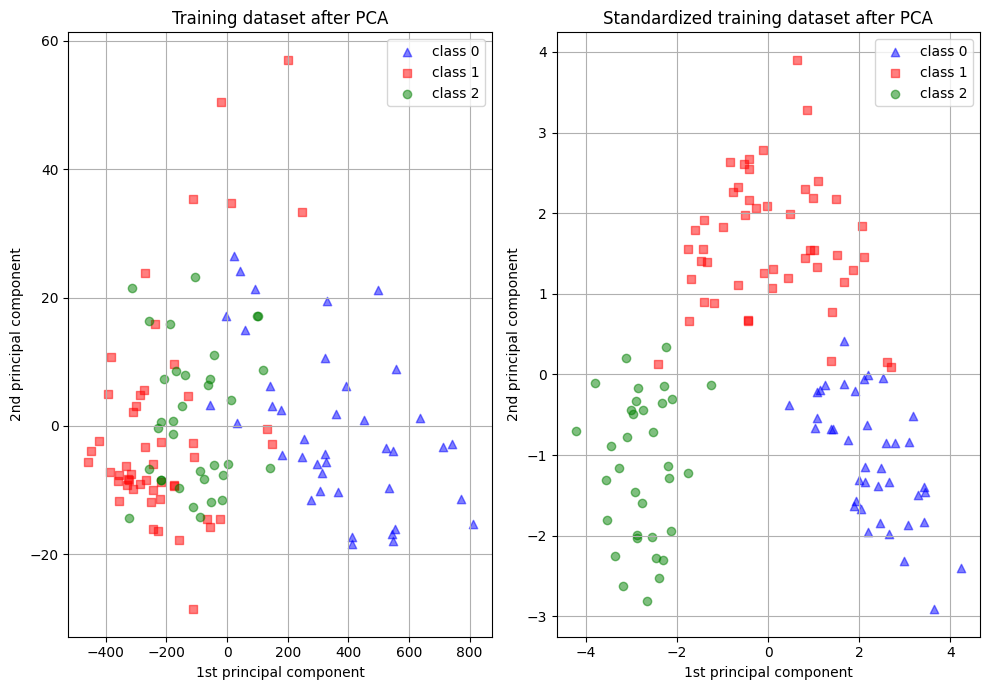

In [32]:
demo_make_pipeline(pca_enable=True)

## Now we move on the next session which is about categorial features and data imputation

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [197]:
# Open the csv file and skim through it. It does not have column names 
# so we will allocate names to each column 

# Naming the Columns
names = ['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

# Load dataset
df = pd.read_csv('../data/adult.csv', names=names, na_values='?')
df = df.dropna()

In [198]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [199]:
len(df)

32561

In [200]:
# TASK 1: Get the unique values in the race column 
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [201]:
# TASK 2: Get the unique values in the 'y' column 
df['y'].unique()

array([' <=50K', ' >50K'], dtype=object)

Text(0.5, 1.0, 'Race')

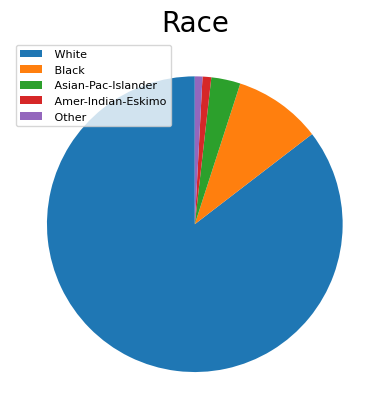

In [202]:
# TODO: Get the popluation count by race
counts = df['race'].value_counts()
labels = counts.index

# Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=8)
plt.title("Race",size=20)

In [203]:
# TASK 3
# We see redundant space prefix in the values. Remove them.
df['race'] = df['race'].apply(lambda x: x.strip())
df['y'] = df['y'].apply(lambda x: x.strip())

In [204]:
df['race'].unique(), df['y'].unique(), df['occupation'].unique()

(array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
        'Other'], dtype=object),
 array(['<=50K', '>50K'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object))

Hmmm it's not just the race and y column.

In [205]:
# Let's try to apply this to all the string-valued columns
for col_name in df.columns:
    if not 'int' in str(df[col_name].dtype):
        df[col_name] = df[col_name].apply(lambda x: x.strip())

In [206]:
for col_name in df.columns:
    if not 'int' in str(df[col_name].dtype):
        print(df[col_name].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

All done!  
Now let's specifically look into the 'race' and 'y' columns

In [207]:
df[['race', 'y']].head(10)

,race,y
0,White,<=50K
1,White,<=50K
2,White,<=50K
3,Black,<=50K
4,Black,<=50K
5,White,<=50K
6,Black,<=50K
7,White,>50K
8,White,>50K
9,White,>50K


In [208]:
# TASK 4: Convert categorical and target variables to binary numerical values
# We now show converting them into binary values, but later in this notebook 
# we will show how we encode them into different labels using LabelEncoder and OneHotEncoder
# Also, if you see a SettingWithCopyWarning, ignore for now.

# Converting White into 1 else 0
# df_numerical['num_race'] = [1 if r=='White' else 0 for r in df_numerical['race']]
df["race"] = np.where(df["race"] == "White", 1, 0)

# Define target variable 
# Converting >50k into 1 and others into 0
df["y"] = np.where(df["y"] == ">50K", 1, 0)

df[['race', 'y']].head(10)

,race,y
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,1
8,1,1
9,1,1


Now, let's map the occupation into different numerical values

In [209]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [210]:
# For occupation converting different categories to numerical values
occ_mapping = {
    'Priv-house-serv':0,'?':-1, 'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4
}

In [211]:
# TASK 5: using 'map' function in pandas, map the categorical values into numerical values
df["occupation"] = df["occupation"].map(occ_mapping).astype(int)
df['occupation']

0        1
1        4
2        0
3        0
4        4
        ..
32556    3
32557    1
32558    1
32559    1
32560    4
Name: occupation, Length: 32561, dtype: int64

### Dealing with Missing data

#### In processing the data earlier, we did not take account of the missing values. 

In [212]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,1,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,1,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,0,Not-in-family,1,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,0,Husband,0,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,4,Wife,0,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,3,Wife,1,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,1,Husband,1,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,1,Unmarried,1,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,1,Own-child,1,Male,0,0,20,United-States,0


In [213]:
# TASK 7
# Drop the missing values, i.e. values with '?' in the occupation and native country 
for col_name in df.columns:
    df = df.loc[df[col_name] != '?']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,1,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,1,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,0,Not-in-family,1,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,0,Husband,0,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,4,Wife,0,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,3,Wife,1,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,1,Husband,1,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,1,Unmarried,1,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,1,Own-child,1,Male,0,0,20,United-States,0


Look, the the number of rows shrinked down to 30162 from 32561

Above is the case where we want specific ordinal values for each occupation. What if we don't care?
We can use LabelEncoder
###  Basic Usage of LabelEncoder

In [214]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [215]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [216]:
# let's encode workclass column
work_class_list = list(df['workclass'].unique())
work_class_list

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [217]:
label_encoder.fit(work_class_list)
list(label_encoder.classes_)

['Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay']

In [218]:
label_encoder.transform(work_class_list)

array([6, 5, 3, 0, 1, 4, 7, 2])

### Now let's use this in our df

In [219]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,1,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,1,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,0,Not-in-family,1,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,0,Husband,0,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,4,Wife,0,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,3,Wife,1,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,1,Husband,1,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,1,Unmarried,1,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,1,Own-child,1,Male,0,0,20,United-States,0


In [220]:
label_encoder = preprocessing.LabelEncoder()

In [221]:
categ = ['workclass','education','marital-status','relationship', 'sex', 'native-country']

# TASK 6: Encode Categorical Columns
# label_encoder.fit_transform fits label encoder and returns encoded labels.
df[categ] = df[categ].apply(label_encoder.fit_transform)

In [222]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,6,77516,9,13,4,1,1,1,1,2174,0,40,38,0
1,50,5,83311,9,13,2,4,0,1,1,0,0,13,38,0
2,38,3,215646,11,9,0,0,1,1,1,0,0,40,38,0
3,53,3,234721,1,7,2,0,0,0,1,0,0,40,38,0
4,28,3,338409,9,13,2,4,5,0,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,3,5,1,0,0,0,38,38,0
32557,40,3,154374,11,9,2,1,0,1,1,0,0,40,38,1
32558,58,3,151910,11,9,6,1,4,1,0,0,0,40,38,0
32559,22,3,201490,11,9,4,1,3,1,1,0,0,20,38,0


### Now, train an SVM or KNN Classifier and check the metrics by using the function below

In [223]:
# TASK 8: Training an SVM Classifier
None

In [224]:
# Calcualte the Accuracy of the model
def accuracy_metric(y, y_pred):
    """Calculate fairness for subgroup of population"""
    
    cm=confusion_matrix(y, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    FNR = FN/(TP+FN) # False negative rate
    PPP = (TP + FP)/N # % predicted as positive
    
    return np.array([ACC, TPR, FPR, FNR, PPP])  

#### Question 1 : Try training a classifier with and without dealing with missing values
#### Question 2: Try OneHotEncoder instead of LabelEncoder and compare the performance of the models